## Titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

** <B> The Main objective this activity is “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). </B>**

In [772]:
# import necessary libraries
import numpy as np # linear algebra
import pandas as pd # Data Processing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [773]:
#import the dataset
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Taitanic\New folder\train.csv")
df_test = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Taitanic\New folder\test.csv")

In [774]:
df.shape

(891, 12)

In [775]:
df_test.shape

(418, 11)

### Basic Data Exploration

In [776]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [777]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [779]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


 
     PassengerId: Id column
     Survived: This is our target variable (0 = No, 1 = Yes)
     Pclass : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
     Name: Name of the Passenger
     sex: Gender of the person (Male , Female)
     Age: Age of the person
     SibSp: # of siblings / spouses aboard the Titanic
     parch: # of parents / children aboard the Titanic
     ticket: Ticket number
     fare: Passenger fare
     cabin: Cabin number
     embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [780]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above , we can see that 38% of the training dataset passenger survived the mishap.

Let us check the missing value percentage

In [781]:
a = pd.DataFrame(round(df.isnull().sum().sort_values(ascending = False)*100/df.shape[0],2)).reset_index()
a.rename(columns={"index":"Feature",0:"%"},inplace = True)
b = pd.DataFrame(df.isnull().sum().sort_values(ascending = False).reset_index())
b.rename(columns={"index":"Feature",0:"Actual"},inplace = True)
ab = pd.merge(b,a,how='left',on='Feature')
ab[ab['Actual']>0]

,Feature,Actual,%
0,Cabin,687,77.10
1,Age,177,19.87
2,Embarked,2,0.22


We can see that most of the values from Cabin is missing and imputing 77% of missing value is marely impossible. Hence, we would better drop this column. Age column has almost 20% missing value. It is an important feature and we can try to impute and Embarked is very less row that has missing value. Hence, we can also treat this

In [782]:
a = pd.DataFrame(round(df_test.isnull().sum().sort_values(ascending = False)*100/df_test.shape[0],2)).reset_index()
a.rename(columns={"index":"Feature",0:"%"},inplace = True)
b = pd.DataFrame(df_test.isnull().sum().sort_values(ascending = False).reset_index())
b.rename(columns={"index":"Feature",0:"Actual"},inplace = True)
ab = pd.merge(b,a,how='left',on='Feature')
ab[ab['Actual']>0]

,Feature,Actual,%
0,Cabin,327,78.23
1,Age,86,20.57
2,Fare,1,0.24


We can see that most of the values from Cabin is missing and imputing 78% of missing value is marely impossible. Hence, we would better drop this column. Age column has  20% missing value. It is an important feature and we can try to impute and Embarked is very less row that has missing value. Hence, we can also treat this

In [783]:
# Let us take a copy of the dataset before further processing:
df1 = df.copy()

In [784]:
#Let us drop the column Cabin
df1.drop('Cabin',axis=1,inplace = True)

In [785]:
df1.shape

(891, 11)

In [786]:
df_test1 = df_test.copy()

In [787]:
#Let us drop the column Cabin
df_test1.drop('Cabin',axis=1,inplace = True)

In [788]:
df_test1.shape

(418, 10)

In [789]:
# Let us remove the non-essential columns from the dataset
df1.drop(['PassengerId','Ticket'],axis=1,inplace = True)

In [790]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Feature Engineering

 If we combine Sibsp and Parch together then we can get total number as a family. Hence, we can find further count of people
who were travelling solo and who were traveling with others and can check the survival rate

In [791]:
df1['Family'] = df1['SibSp']+df1['Parch']
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [792]:
#Let us drop Sibsp and Parch columns from the dataset
df1.drop(['SibSp','Parch'],axis=1,inplace =True)

In [793]:
df1.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0


In [794]:
df1.Family.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [795]:
# Let us group the passengers into two. Those who are travelling soolo are mentioned as 0 and those who are travelling with 
#Partners are marked with 1
df1['Partner']= np.where(df1['Family']>0,1,0)
df1.drop('Family',axis=1,inplace = True)

In [796]:
# from the Title of a person we can categorize a set of people into a single group. Hence let us extract the title from the name
df1['Title']=df1.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df1.drop('Name',axis=1,inplace = True)

In [797]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Partner,Title
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


In [798]:
# Let us check the type of titles that we have. If we can categorize those titles in better fashion, it will be better 
df1.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Jonkheer          1
the Countess      1
Sir               1
Lady              1
Don               1
Mme               1
Capt              1
Name: Title, dtype: int64

In [799]:
# Catgorize the titles:
Title_1 = {
    "Capt":        "Other",
    "Col":         "Other",
    "Major":       "Other",
    "Jonkheer":    "Other",
    "Don":         "Other",
    "Sir" :        "Other",
    "Dr":          "Other",
    "Rev":         "Other",
    "the Countess": "Other",
    "Dona":        "Other",
    "Mme":        "Mrs",  # it means "Mrs",
    "Mlle":       "Miss",  # it means "Miss",
    "Ms":         "Mrs",  # it means "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Other"
}

In [800]:
# Replace the Title with the new titles
df1['Title'] = df1.Title.map(Title_1)

In [801]:
df1.Title.value_counts()

Mr        517
Miss      184
Mrs       127
Master     40
Other      23
Name: Title, dtype: int64

#### Missing Value imputation

In [802]:
# Now, group the data based on Age,sex and Title
df1_grouped = df1.groupby(['Sex','Pclass', 'Title'])

In [803]:
df1_grouped.Age.median()

Sex     Pclass  Title 
female  1       Miss      30.0
                Mrs       40.0
                Other     48.0
        2       Miss      24.0
                Mrs       31.5
        3       Miss      18.0
                Mrs       31.0
male    1       Master     4.0
                Mr        40.0
                Other     49.0
        2       Master     1.0
                Mr        31.0
                Other     46.5
        3       Master     4.0
                Mr        26.0
Name: Age, dtype: float64

In [804]:
# Now apply the grouped median value on the Age whereever it is null
df1.Age = df1_grouped.Age.apply(lambda x: x.fillna(x.median()))


In [805]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
Partner     891 non-null int32
Title       891 non-null object
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 52.3+ KB


In [806]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Partner,Title
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


In [807]:
# Embarked

In [808]:
a = df1[df1['Pclass']==1]['Embarked'].value_counts()
a

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [809]:
b = df1[df1['Pclass']==2]['Embarked'].value_counts()
b

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [810]:
c = df1[df1['Pclass']==3]['Embarked'].value_counts()
c

S    353
Q     72
C     66
Name: Embarked, dtype: int64

For all kind of passenger class, it is Embarked = 'S' (Southampton) where most of the Embarkation happend. Hence let us fill the missing values of column Embarked with S

In [811]:
df1['Embarked'] = df1['Embarked'].fillna('S')

In [812]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null object
Partner     891 non-null int32
Title       891 non-null object
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 52.3+ KB


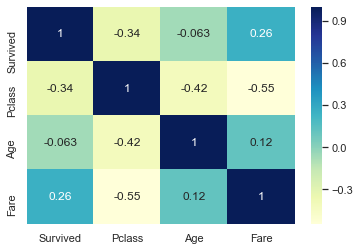

In [813]:
all_numeric = df1.select_dtypes(include=['float64', 'int64'])
cor = all_numeric.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [814]:
df_test1['Family'] = df_test1['SibSp']+df_test1['Parch']
df_test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2


In [815]:
#Let us drop Sibsp and Parch columns from the dataset
df_test1.drop(['SibSp','Parch','Ticket'],axis=1,inplace =True)

In [816]:
df_test1.Family.value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: Family, dtype: int64

In [817]:
# Let us group the passengers into two. Those who are travelling soolo are mentioned as 0 and those who are travelling with 
#Partners are marked with 1
df_test1['Partner']= np.where(df_test1['Family']>0,1,0)
df_test1.drop('Family',axis=1,inplace = True)

In [818]:
# from the Title of a person we can categorize a set of people into a single group. Hence let us extract the title from the name
df_test1['Title']=df_test1.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_test1.drop('Name',axis=1,inplace = True)

In [819]:
df_test1.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Partner,Title
0,892,3,male,34.5,7.8292,Q,0,Mr
1,893,3,female,47.0,7.0000,S,1,Mrs
2,894,2,male,62.0,9.6875,Q,0,Mr
3,895,3,male,27.0,8.6625,S,0,Mr
4,896,3,female,22.0,12.2875,S,1,Mrs


In [820]:
# Let us check the type of titles that we have. If we can categorize those titles in better fashion, it will be better 
df_test1.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [821]:
# Catgorize the titles:
Title_1 = {
    "Capt":        "Other",
    "Col":         "Other",
    "Major":       "Other",
    "Jonkheer":    "Other",
    "Don":         "Other",
    "Sir" :        "Other",
    "Dr":          "Other",
    "Rev":         "Other",
    "the Countess": "Other",
    "Dona":        "Other",
    "Mme":        "Mrs",  # it means "Mrs",
    "Mlle":       "Miss",  # it means "Miss",
    "Ms":         "Mrs",  # it means "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Other"
}

In [822]:
# Replace the Title with the new titles
df_test1['Title'] = df_test1.Title.map(Title_1)

In [823]:
df_test1.Title.value_counts()

Mr        240
Miss       78
Mrs        73
Master     21
Other       6
Name: Title, dtype: int64

In [824]:
# Now, group the data based on Age,sex and Title
df_test1_grouped = df_test1.groupby(['Sex','Pclass', 'Title'])

In [825]:
df_test1_grouped.Age.median()

Sex     Pclass  Title 
female  1       Miss      32.0
                Mrs       48.0
                Other     39.0
        2       Miss      19.5
                Mrs       29.0
        3       Miss      22.0
                Mrs       28.0
male    1       Master     9.5
                Mr        42.0
                Other     53.0
        2       Master     5.0
                Mr        28.0
                Other     35.5
        3       Master     7.0
                Mr        25.0
Name: Age, dtype: float64

In [826]:
# Now apply the grouped median value on the Age whereever it is null
df_test1.Age = df_test1_grouped.Age.apply(lambda x: x.fillna(x.median()))


In [827]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
Fare           417 non-null float64
Embarked       418 non-null object
Partner        418 non-null int32
Title          418 non-null object
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 24.6+ KB


In [828]:
#Since there is only one row which is left blank for fare, let us fill the blank with the median
df_test1['Fare'].fillna((df_test1['Fare'].median()), inplace=True)

In [829]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
Fare           418 non-null float64
Embarked       418 non-null object
Partner        418 non-null int32
Title          418 non-null object
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 24.6+ KB


Let us check the relation of survival by each column

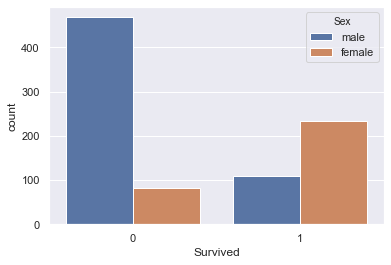

In [830]:
# Let us see that survival ratio of male and female
sns.set(style="darkgrid")
sns.countplot(x="Survived",hue="Sex", data=df1)

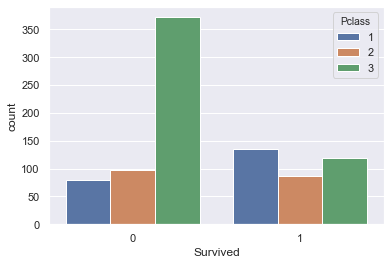

In [831]:
# Check for Passenger Class
sns.set(style="darkgrid")
sns.countplot(x="Survived",hue="Pclass", data=df1)

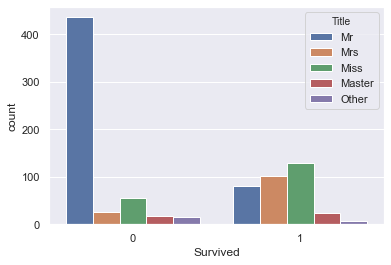

In [832]:
# Check by Passenger title
sns.set(style="darkgrid")
sns.countplot(x="Survived",hue="Title", data=df1)

Most of the people who did not able to survive were man. People those who could able survived were from unmarried ladies from lower age range followed by married ladies and gentleman. However, children survival rate is less compare to othres. Let us check only for children what went wrong there

In [833]:
df2 = df1[df1['Title']=="Master"]
len(df2)

40

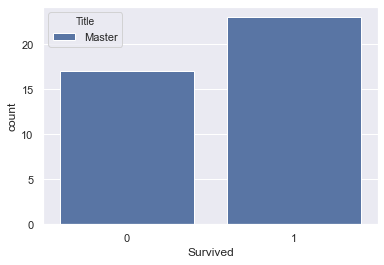

In [834]:
# Check by children only
sns.set(style="darkgrid")
sns.countplot(x="Survived",hue="Title", data=df2)

From the above section, we can see that there were 40 children were present in the train data, and survival rate nearly 60:40 ratio

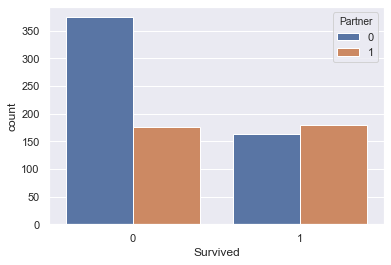

In [835]:
# Check by Partner  only
sns.set(style="darkgrid")
sns.countplot(x="Survived",hue="Partner", data=df1)

In [836]:
df2 = df1[df1['Partner']==0]
len(df2)

537

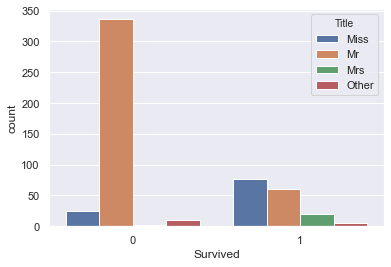

In [837]:
sns.set(style="darkgrid")
sns.countplot(x="Survived",hue="Title", data=df2)

From the above section, it can be seen that male solo travellers were mostly not able to survived 

In [838]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Partner,Title
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


In [839]:
df_test1.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Partner,Title
0,892,3,male,34.5,7.8292,Q,0,Mr
1,893,3,female,47.0,7.0000,S,1,Mrs
2,894,2,male,62.0,9.6875,Q,0,Mr
3,895,3,male,27.0,8.6625,S,0,Mr
4,896,3,female,22.0,12.2875,S,1,Mrs


In [840]:
#Now convert the male and female to 0 and 1
df_test1.Sex = df1.Sex.map({"male": 0, "female":1})

In [841]:
#Now convert the male and female to 0 and 1
df1.Sex = df1.Sex.map({"male": 0, "female":1})

In [842]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
embarked_dm = pd.get_dummies(df1[['Embarked']],drop_first = True)
pclass_dm = pd.get_dummies(df1[['Pclass']],drop_first = True)
title_dm = pd.get_dummies(df1[['Title']],drop_first = True)

In [843]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
embarked_dm_test = pd.get_dummies(df_test1[['Embarked']],drop_first = True)
pclass_dm_test = pd.get_dummies(df_test1[['Pclass']],drop_first = True)
title_dm_test = pd.get_dummies(df_test1[['Title']],drop_first = True)

In [844]:
# Adding the results to the master dataframe
df1 = pd.concat([df1, embarked_dm,pclass_dm,title_dm], axis=1)


In [845]:
# drop the source categorical columns from which we have created dummy variables:
df1.drop(['Embarked','Pclass','Title'],axis = 1,inplace = True)

In [846]:
# Adding the results to the master dataframe
df_test1 = pd.concat([df_test1, embarked_dm_test,pclass_dm_test,title_dm_test], axis=1)


In [847]:
# drop the source categorical columns from which we have created dummy variables:
df_test1.drop(['Embarked','Pclass','Title'],axis = 1,inplace = True)

In [848]:
df1.head()

,Survived,Sex,Age,Fare,Partner,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,0,22.0,7.2500,1,0,1,0,1,0,0
1,1,1,38.0,71.2833,1,0,0,0,0,1,0
2,1,1,26.0,7.9250,0,0,1,1,0,0,0
3,1,1,35.0,53.1000,1,0,1,0,0,1,0
4,0,0,35.0,8.0500,0,0,1,0,1,0,0


In [849]:
df_test1.head()

,PassengerId,Sex,Age,Fare,Partner,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,0,34.5,7.8292,0,1,0,0,1,0,0
1,893,1,47.0,7.0000,1,0,1,0,0,1,0
2,894,1,62.0,9.6875,0,1,0,0,1,0,0
3,895,1,27.0,8.6625,0,0,1,0,1,0,0
4,896,0,22.0,12.2875,1,0,1,0,0,1,0


Now we need to standardized the Age and Fare column

In [850]:
from sklearn.preprocessing import StandardScaler

In [851]:
col = ['Fare', 'Age']
scale = StandardScaler()
df1[col] = scale.fit_transform(df1[col])
df1.head()

,Survived,Sex,Age,Fare,Partner,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,0,-0.529214,-0.502445,1,0,1,0,1,0,0
1,1,1,0.657366,0.786845,1,0,0,0,0,1,0
2,1,1,-0.232569,-0.488854,0,0,1,1,0,0,0
3,1,1,0.434882,0.420730,1,0,1,0,0,1,0
4,0,0,0.434882,-0.486337,0,0,1,0,1,0,0


In [852]:
col = ['Fare', 'Age']
scale = StandardScaler()
df_test1[col] = scale.fit_transform(df_test1[col])
df_test1.head()

,PassengerId,Sex,Age,Fare,Partner,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,0,0.387338,-0.497413,0,1,0,0,1,0,0
1,893,1,1.337720,-0.512278,1,0,1,0,0,1,0
2,894,1,2.478178,-0.464100,0,1,0,0,1,0,0
3,895,1,-0.182892,-0.482475,0,0,1,0,1,0,0
4,896,0,-0.563045,-0.417492,1,0,1,0,0,1,0


### Modelling:
Let us start the modelling part now. First drop the Survived column from the train dataset

In [853]:
# create X and y for data and target values
X = df1.drop('Survived', axis=1).values
y = df1.Survived.values

In [854]:
from sklearn.model_selection import train_test_split

In [855]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [856]:
from sklearn.linear_model import LogisticRegression

In [857]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [858]:
logmodel.score(X_train,y_train)

0.7913322632423756

Making Predictions

In [859]:
test_x = df_test1.drop('PassengerId',axis=1)

In [861]:
predictions = logmodel.predict(test_x)

In [862]:
final_prediction = pd.DataFrame({'PassengerId':df_test1['PassengerId'],'Survived':predictions})

In [863]:
final_prediction.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
